In [1]:
import brewer2mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set up some better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [3]:
data = {"p1": "qlearning", "p2": {"minimax": [.7, .2, .1], "random": [.5, .2, .3], \
                              "mcts": [.8, .1, .1], "extend": [.1, .1, .8], "qlearning": [.33, .33, .33]}}

In [4]:
win = [data["p2"][learner][0] for learner in data["p2"]]
draw = [data["p2"][learner][1] for learner in data["p2"]]
loss = [data["p2"][learner][2] for learner in data["p2"]]

In [5]:
print(win, draw, loss)

([0.7, 0.5, 0.33, 0.1, 0.8], [0.2, 0.2, 0.33, 0.1, 0.1], [0.1, 0.3, 0.33, 0.8, 0.1])


In [6]:
red, gray, green = '#a50026', '#878787', '#006837'

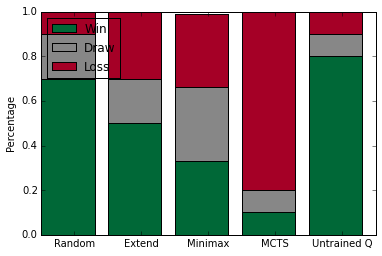

In [11]:
red, gray, green = '#a50026', '#878787', '#006837'

plt.bar([0, 1, 2, 3, 4], win, color=green, label='Win')
plt.bar([0, 1, 2, 3, 4], draw, color=gray, label='Draw', bottom = win)
plt.bar([0, 1, 2, 3, 4], loss, color=red, label='Loss', bottom = [draw[i] + win[i] for i in range(0, len(draw))])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['Random', 'Extend', 'Minimax', 'MCTS', 'Untrained Q'], rotation='horizontal')
plt.ylabel("Percentage")
plt.xlabel("")
plt.legend(loc='upper left')
#remove_border()
plt.show()
